## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#Scikit learn imports:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

## Data Prep

In [2]:
from src.dataprep import prep_df

In [3]:
df = prep_df()
df.dropna(inplace = True)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,-1.239504,0.196178,-0.940457


In [5]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = .2, random_state = 7)

### KNN

For KNN I am planning on messing with the n_neighbors and p parameters to see if I can do better than the default model

I'm going to start with n_neigbors and then mess with p

In [29]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 2, p = 2)
knn.fit(X_t, y_t)
print("Train:")
print(knn.score(X_t, y_t))
print("Val:")
print(knn.score(X_val, y_val))

Train:
0.8535173642030276
Val:
0.7295373665480427


In [30]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3, p = 2)
knn.fit(X_t, y_t)
print("Train:")
print(knn.score(X_t, y_t))
print("Val:")
print(knn.score(X_val, y_val))

Train:
0.8555209260908282
Val:
0.7277580071174378


In [31]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 7, p = 2)
knn.fit(X_t, y_t)
print("Train:")
print(knn.score(X_t, y_t))
print("Val:")
print(knn.score(X_val, y_val))

Train:
0.8078806767586821
Val:
0.744661921708185


In [32]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2)
knn.fit(X_t, y_t)
print("Train:")
print(knn.score(X_t, y_t))
print("Val:")
print(knn.score(X_val, y_val))

Train:
0.7931878895814782
Val:
0.7562277580071174


In [33]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 12, p = 2)
knn.fit(X_t, y_t)
print("Train:")
print(knn.score(X_t, y_t))
print("Val:")
print(knn.score(X_val, y_val))

Train:
0.792520035618878
Val:
0.7544483985765125


In [34]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 11, p = 2)
knn.fit(X_t, y_t)
print("Train:")
print(knn.score(X_t, y_t))
print("Val:")
print(knn.score(X_val, y_val))

Train:
0.7896260017809439
Val:
0.7633451957295374


n = 11 seems to be working well, now to mess with p

In [35]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 3)
knn.fit(X_t, y_t)
print("Train:")
print(knn.score(X_t, y_t))
print("Val:")
print(knn.score(X_val, y_val))

Train:
0.8145592163846839
Val:
0.7491103202846975


In [36]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 5)
knn.fit(X_t, y_t)
print("Train:")
print(knn.score(X_t, y_t))
print("Val:")
print(knn.score(X_val, y_val))

Train:
0.8141139804096171
Val:
0.748220640569395


In [37]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 1)
knn.fit(X_t, y_t)
print("Train:")
print(knn.score(X_t, y_t))
print("Val:")
print(knn.score(X_val, y_val))

Train:
0.8243544078361532
Val:
0.7526690391459074


p = 1 did a tiny bit better than p >= 2, now for n = 11, p = 1

In [40]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 11, p = 1)
knn.fit(X_t, y_t)
print("Train:")
print(knn.score(X_t, y_t))
print("Val:")
print(knn.score(X_val, y_val))

Train:
0.8018699910952805
Val:
0.7669039145907474


[[716 111]
 [151 146]]


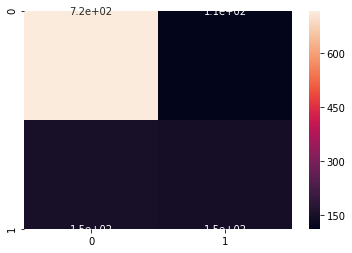

In [43]:
y_hat = knn.predict(X_val)
cf_mat = confusion_matrix(y_val, y_hat)
print(cf_mat)
sns.heatmap(cf_mat, annot=True)

### Random Forest

In a bid to fight overfitting I will increase the number of trees, reduce the maximum features, and play with the maximum depth.

First doing # of trees/ n-estimators, keeping others at default

Note: my default for n_estimators is 10, not 100, but I had mistakenly believed that I had the most recent version of sklearn.

In [7]:
rf = RandomForestClassifier(n_estimators=200, max_depth=None, max_features='auto')

rf.fit(X_t, y_t)

print("Train:")
print(rf.score(X_t, y_t))
print("Val:")
print(rf.score(X_val, y_val))

Train:
1.0
Val:
0.7740213523131673


In [19]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, max_features='auto')

rf.fit(X_t, y_t)

print("Train:")
print(rf.score(X_t, y_t))
print("Val:")
print(rf.score(X_val, y_val))

Train:
1.0
Val:
0.7811387900355872


Made it more accurate but now its 100% overfit

Now on to max_depth

In [8]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features='auto')

rf.fit(X_t, y_t)

print("Train:")
print(rf.score(X_t, y_t))
print("Val:")
print(rf.score(X_val, y_val))

Train:
0.7836153161175423
Val:
0.7900355871886121


In [9]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='auto')

rf.fit(X_t, y_t)

print("Train:")
print(rf.score(X_t, y_t))
print("Val:")
print(rf.score(X_val, y_val))

Train:
0.9085040071237755
Val:
0.7935943060498221


In [21]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7, max_features='auto')

rf.fit(X_t, y_t)

print("Train:")
print(rf.score(X_t, y_t))
print("Val:")
print(rf.score(X_val, y_val))

Train:
0.804986642920748
Val:
0.7829181494661922


Good, very good, Now onto max_features

In [13]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, max_features=10)

rf.fit(X_t, y_t)

print("Train:")
print(rf.score(X_t, y_t))
print("Val:")
print(rf.score(X_val, y_val))

Train:
1.0
Val:
0.7615658362989324


In [20]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, max_features=5)

rf.fit(X_t, y_t)

print("Train:")
print(rf.score(X_t, y_t))
print("Val:")
print(rf.score(X_val, y_val))

Train:
1.0
Val:
0.7784697508896797


Overfit but small accuracy boost, time to use a max_depth of 7 along with the other parameters.

In [41]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7, max_features=5)

rf.fit(X_t, y_t)

print("Train:")
print(rf.score(X_t, y_t))
print("Val:")
print(rf.score(X_val, y_val))

Train:
0.8201246660730187
Val:
0.7953736654804271


In [28]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7, max_features=6)

rf.fit(X_t, y_t)

print("Train:")
print(rf.score(X_t, y_t))
print("Val:")
print(rf.score(X_val, y_val))

Train:
0.8192341941228851
Val:
0.7900355871886121


100, 7, 5 looks like my best bet for now

[[756  71]
 [159 138]]


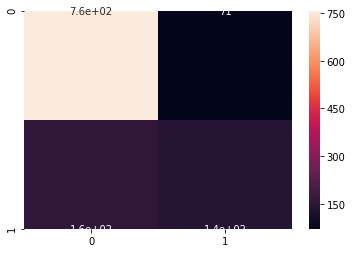

In [42]:
y_hat2 = rf.predict(X_val)
cf_mat = confusion_matrix(y_val, y_hat2)
print(cf_mat)
sns.heatmap(cf_mat, annot=True)